In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 

In [3]:
root_path = "D:\Biometrics\Codes\DatasetB"
dest_path = "D:\Biometrics\Codes\GEI Images"
image_dirs = os.listdir(root_path)

In [4]:
for directory in image_dirs:
    print(directory)
    class_path = os.path.join(root_path, directory)
    print(class_path)
    envs = os.listdir(class_path)
    #print(envs)
    for environment in envs:
        print(environment)
        env_path = os.path.join(class_path, environment)
        print(env_path)
        angles = os.listdir(env_path)
        #print(angles)
        for angle in angles:
            print(angle)
            break
        break
    break

124
D:\Biometrics\Codes\DatasetB\124
bg-01
D:\Biometrics\Codes\DatasetB\124\bg-01
000


In [7]:
from imageio import imread
from PIL import Image

In [8]:
def mass_center(img,is_round=True):
    Y = img.mean(axis=1)
    X = img.mean(axis=0)
    Y_ = np.sum(np.arange(Y.shape[0]) * Y)/np.sum(Y)
    X_ = np.sum(np.arange(X.shape[0]) * X)/np.sum(X)
    if is_round:
        return int(round(X_)),int(round(Y_))
    return X_,Y_

In [9]:
def image_extract(img,newsize):
    #print(img.shape)
        
    x_s = np.where(img.mean(axis=0)!=0)[0].min()
    x_e = np.where(img.mean(axis=0)!=0)[0].max()
    
    y_s = np.where(img.mean(axis=1)!=0)[0].min()
    y_e = np.where(img.mean(axis=1)!=0)[0].max()
    
    x_c,_ = mass_center(img)
    x_c = (x_s+x_e)//2
    x_s = x_c-newsize[1]//2
    x_e = x_c+newsize[1]//2
    img = img[y_s:y_e,x_s if x_s>0 else 0:x_e if x_e<img.shape[1] else img.shape[1]]
    im = np.array(Image.fromarray(img).resize(newsize))
    return im

In [10]:
path = "D:\\Biometrics\\Casia\\test"
files = os.listdir(path)
#print(os.listdir(path))
images = []
for img in files:
    img = imread(path + "\\" + img)
    images.append(img)
print(len(images))

89


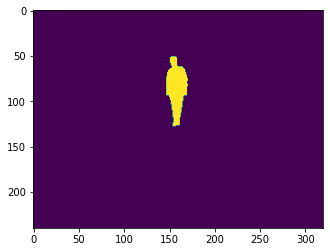

In [11]:
plt.imshow(images[1])

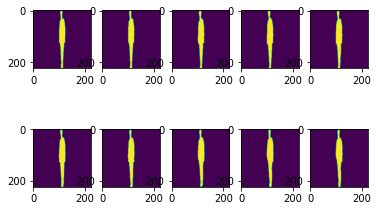

In [12]:
images = [image_extract(i,(224, 224)) for i in images]
plt.figure()
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(images[i])
plt.show()

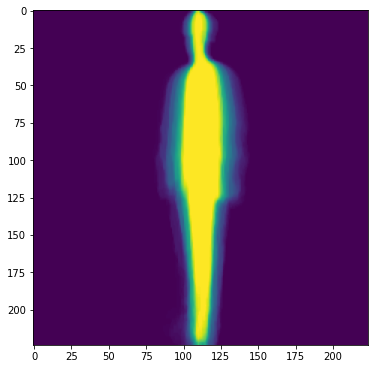

In [12]:
gei = np.mean(images,axis=0)
plt.figure(figsize=(6,10))
plt.imshow(gei)
plt.show()

In [13]:
def make_gei(image_list, size = (224, 224)):
    images = [image_extract(i, size) for i in image_list]
    gei = np.mean(images,axis = 0)
    return  gei

In [14]:
root_path = "D:\Biometrics\Codes\DatasetB"
dest_path = "D:\Biometrics\Codes\GEI Images"
image_dirs = os.listdir(root_path)

In [15]:
for directory in image_dirs:
    #print("directory = ", directory)
    class_path = os.path.join(root_path, directory)
    #print("directory = ", class_path)
    print("working in " , directory)
    ##make directory
    destination_path = os.path.join(dest_path, directory)
    #print("destination = ", destination_path)
    if not (os.path.exists(destination_path)):
        os.mkdir(destination_path)
    
    envs = os.listdir(class_path)
    #print(envs)
    for environment in envs:
        #print("condition = ", environment)
        env_path = os.path.join(class_path, environment)
        #print("condition = ",env_path)
        angles = os.listdir(env_path)
        #print(angles)

        print(" for environment ", environment)
        
        for angle in angles:
            #print("angle = ", angle)
            final_path = os.path.join(env_path, angle)
            #print("images_path = ", final_path)         
            files = os.listdir(final_path)
            #print(files)

            #destination angle folder
            dest_angle_path = os.path.join(destination_path, angle)
            #print("final_save folder", dest_angle_path)
            
            print("   angle :", angle)
            if not(os.path.exists(dest_angle_path)):
                os.mkdir(dest_angle_path)

            images = []
            for img in files:
                img = imread(final_path + "\\" + img)
                images.append(img)
            #print(len(images))
            gei = make_gei(images)
            #saving
            #im = Image.fromarray(gei)
            #im.save(dest_angle_path, 'JPEG')
            cv2.imwrite( f"{dest_angle_path}\\{environment+angle}.jpeg", gei) 

            #break
        #break
    #break

working in  124
 for environment  bg-01
   angle : 000
   angle : 018
   angle : 036
   angle : 054
   angle : 072
   angle : 090
   angle : 108
   angle : 126
   angle : 144
   angle : 162
   angle : 180
 for environment  bg-02
   angle : 000
   angle : 018
   angle : 036
   angle : 054
   angle : 072
   angle : 090
   angle : 108
   angle : 126
   angle : 144
   angle : 162
   angle : 180
 for environment  cl-01
   angle : 000
   angle : 018
   angle : 036
   angle : 054
   angle : 072
   angle : 090
   angle : 108
   angle : 126
   angle : 144
   angle : 162
   angle : 180
 for environment  cl-02
   angle : 000
   angle : 018
   angle : 036
   angle : 054
   angle : 072
   angle : 090
   angle : 108
   angle : 126
   angle : 144
   angle : 162
   angle : 180
 for environment  nm-01
   angle : 000
   angle : 018
   angle : 036
   angle : 054
   angle : 072
   angle : 090
   angle : 108
   angle : 126
   angle : 144
   angle : 162
   angle : 180
 for environment  nm-02
   angle : 000
